# Calibration Size Study

This notebook studies the optimal calibration size.

First, we assume continuous data so that $f_{\hat{\lambda}^*}(\theta_0)$ is $\mathrel{Beta}(k, N+1-k)$ where $k = \lfloor{(N+1) \alpha \rfloor}$.
We can then ask: given $\epsilon, \delta > 0$, find the smallest $N$ such that
$$
\begin{align*}
\mathbb{P}(|Beta(k, N+1-k) - \mu| > \epsilon) \leq \delta
\end{align*}
$$
where $\mu = \mathbb{E}[Beta(k, N+1-k)]$.

In [3]:
import scipy
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

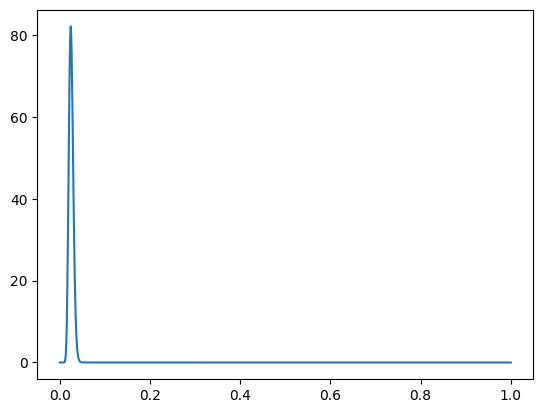

In [4]:
N = 1000
alpha = 0.025
k = int((N+1) * alpha)

x = np.linspace(0, 1, 1000)
px = scipy.stats.beta.pdf(x, k, N+1-k)
plt.plot(x, px)

In [61]:
def tail_prob(N, alpha, eps):
    a = jnp.floor((N+1) * alpha)
    b = N+1-a
    return 1 - (
        jax.scipy.special.betainc(a, b, alpha + eps) -
        jax.scipy.special.betainc(a, b, alpha - eps)
    )
    
def opt_size(min_N, max_N, alpha, eps, delta):
    tail_prob_v = jax.vmap(tail_prob, in_axes=(0, None, None))
    Ns = jnp.arange(min_N, max_N + 1)
    tps = tail_prob_v(Ns, alpha, eps)
    tps = jnp.where(jnp.isnan(tps), 1, tps)
    tp_is_small = tps <= delta
    i_star = jnp.argmax(tp_is_small)
    return Ns[i_star], tp_is_small[i_star]

In [72]:
eps = 0.001
delta = 0.05
opt_size(1, 100000, 0.001, eps, delta)

(DeviceArray(1497, dtype=int32), DeviceArray(True, dtype=bool, weak_type=True))

In [70]:
tail_prob(5000, 0.5, 0.005)

DeviceArray(0.47710228, dtype=float32, weak_type=True)